# Proyecto 1 Etapa 2

## Integrantes
- Raul Rincon (Lider de negocio y lider de datos)- 202120414
- Tomas Angel (Lider del proyecto y lider de negocio) - 202020366
- Luis Felipe Dussán (Lider analitico)- 201912308

## Tareas asignadas

* Luis Felipe Dussan
    * Modelo: Bag of words
    * Resultados texto

* Raul Santiago Rincon
    * Modelo: KNN (k-nearest neighbors)
    * Entendimiento negocio y analitico
    * Entendimiento y preparacion de datos
    * Video

* Tomas Angel
    *  Modelo: Naive Bayes
    *  Entendimiento del negocio
    *  Lider del proyecto
    *  Organizacion y analisis documental
    *  Mapa de actores
    *  Preparacion de resultados




## 1. Entendimiento del negocio y enfoque analítico

## 1.1. Tabla con datos solicitados



* **Oportunidad / problema negocio:**
El negocio quiere mejorar la experiencia turistica y aumentar el numero de visitantes en diferentes atracciones turisticas de Colombia a traves de la mejora continua de la experiencia de los visitantes al realizar un analisis de las reseñas recolectadas para cada sitio turistico. De este modo, los criterios de exito radican en identificar aquellas caracteristicas claves que hacen atractivo un destino turistico, la diferenciacion clara entre sitios con altas y bajas recomendaciones, mecanismos precisos para determinar la calificacion de un sitio por parte de los turistas y generar las estrategias efectivas para mejorar la popularidad de los sitios y fomentar el turismo.
El proyecto puede tener un impacto significativo en Colombia, ya que un análisis efectivo puede llevar a la mejora y promoción de sitios turísticos, lo que podría aumentar el número de turistas tanto locales como extranjeros. Esto a su vez podría tener efectos positivos en la economía local, generando empleo y aumentando los ingresos por turismo.

* **Enfoque analitico:**
Implementar un modelo de aprendizaje automático para analizar los textos que se proporcionan con el objetivo de determinar los aspectos importantes en ellos y comparar en las reseñas y determinar que esta afectando el turismo frente a las opiniones negativas. Se planea usar análisis de sentimientos con el algoritmo como SVM para clasificar texto en diferentes categorias, Naive Bayes para clasificar texto en categorias predefinidas y KNN para encontrar caracteristicas comunes entre los diferentes textos.

* **Organizacíon y rol dentro del enfoque con la oportunidad definida:**
  - El Ministerio de Comercio, Industria y Turismo de Colombia se beneficiaría al tener información detallada sobre los factores que influyen en la popularidad de los sitios turísticos, lo que les permitiría desarrollar políticas y estrategias para promover el turismo.
  - La Asociación Hotelera y Turística de Colombia y las cadenas hoteleras se beneficiarían al conocer las características que hacen atractivos los sitios turísticos, lo que les permitiría ofrecer paquetes y servicios más atractivos para los turistas.
  - Los hoteles pequeños ubicados en diferentes municipios de Colombia se beneficiarían al poder identificar oportunidades de mejora en sus servicios y promocionarlos de manera más efectiva.

* **Contacto con experto externo al proyecto y detalles de planeación:**


  * Estudiantes de estadistica: Matias Bayona y Laura Rivera
  * Fechas de reuniones:
    - Reunion lanzamiento y planeacion: 18 Marzo - 7:00 PM
    - Reunión de ideación: 21 Marzo - 4:00 PM
    - Reuniones de seguimiento: 1, 2, 3 Abril - 8:00 PM
    - Reunión de finalización: 5 Abril - 7:00 PM
  * Canales : Grupo Whatsapp y reunión en zoom

## 2. Entendimiento y preparación de los datos

#### 2.1. Preparacion de los datos de entrenamiento

In [4]:
# !pip install -q contractions
# !pip install -q -U
# !python -m spacy download es_core_news_sm -q

In [5]:
# Importacion de librerias necesarias

import os
import re
import string
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from joblib import dump, load
import contractions
import unicodedata
import inflect
import spacy

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer, HashingVectorizer
from sklearn.inspection import permutation_importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from joblib import dump


ModuleNotFoundError: No module named 'numpy'

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Función para tokenizar las reseñas
def tokenizer(text):
    return word_tokenize(text)

Preparacion de los datos de entrenamiento

In [ ]:
# Cargamos los datos tipo1

df_review = pd.read_csv("/content/tipo1_entrenamiento_estudiantes.csv")

In [ ]:
df_review.shape

(7875, 2)

In [ ]:
df_review.sample(5)

,Review,Class
544,"Estuvimos solo una noche en este hotel, la atención correcta, instalaciones antiguas pero súper limpias, la ubicación es inmejorable, a una cuadra de la habana vieja!! Esa misma noche en la terraza del hotel hacen shows de música en vivo, una barra con tragos, muy bueno!!",4
652,"Paso a contar lo sucedido en el hotel Triton-Neptuno 3 Estrellas: 1) Habitación con graves deficiencias sanitarias y estructurales. Siendo incompatible con una agradable estancia, y las 3 estrellas contratadas con ustedes. - La terraza, presentaba deficiencias estructurales, cascotes en el suelo, el techo caído, la barandilla descolgada y el aire acondicionado inoperativo y oxidado. - Moho en las paredes y humedades en el techo y pared. - Las mesitas de noche no funcionan y los interruptores descolgados. -El suelo de la habitación con grietas estructurales. -La caja fuerte no funcionaba, se necesita una llave , y no la tenia. No pudimos utilizar. -Cuarto de baño: No siempre había agua caliente, el secador no funcionaba, la luz descolgada, la bañera llena de bacterias y…",1
3301,"Visita obligada, les. Recomiendo mejor tomar la guagua que el Turibus, así busquela en Facebook. Pónganse un buen bloqueador,",4
4401,"A menos que un viajero de temporada conseguir el hotel más caro puede, este es uno de los más baratos en La Habana y un hotel económico en La Habana sería condenado en el REINO UNIDO. Me alojé allí por 2 noches y nos levantamos para coger los primeros autobuses de posible",1
3769,"Limpio, personal amable, bien planeado. Muy buen aire acondicionado! Una excelente manera de pasar la mañana o por la tarde con los niños, en un agradable y amplio Aquarium. Una de las mejores atracciones de Veracruz.",4


In [ ]:
df_review["Class"].value_counts()

Class
5    2350
4    1971
3    1568
2    1173
1     813
Name: count, dtype: int64

In [ ]:
df_review["Class"].value_counts(dropna=False, normalize=True)

Class
5    0.298413
4    0.250286
3    0.199111
2    0.148952
1    0.103238
Name: proportion, dtype: float64

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


In [ ]:
# ENTENDIMIENTO DE LOS DATOS

from scipy import stats as st

textos = df_review.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Moda'] = [st.mode([len(x) for x in i.split(' ')])[0] for i in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]

textos.describe()

,Class,Conteo,Moda,Max,Min
count,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,3.491683,407.945016,2.323937,13.211429,0.848254
std,1.328275,434.744952,0.937780,3.125050,0.507458
min,1.000000,33.000000,0.000000,7.000000,0.000000
25%,2.000000,201.000000,2.000000,11.000000,1.000000
50%,4.000000,271.000000,2.000000,13.000000,1.000000
75%,5.000000,503.000000,2.000000,14.000000,1.000000
max,5.000000,14129.000000,11.000000,125.000000,4.000000


Podemos ver que existen valores atípicos en reviews donde podemos evidenciar que existen reseñas de 13933 palabras o palabras de 27 caracteres.

In [ ]:
print("Cantidad de datos duplicados: ",df_review.duplicated().sum())
df_review.drop_duplicates(inplace=True)
print("Cantidad de datos duplicados después: ",df_review.duplicated().sum())

df_review.shape

Cantidad de datos duplicados:  71
Cantidad de datos duplicados después:  0


(7804, 2)

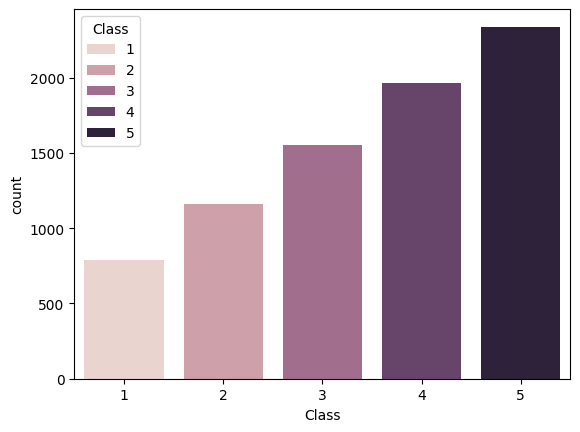

In [ ]:
ax = sns.countplot(x="Class", hue="Class", data=df_review, dodge=False)

Con esta grafica podemos definir que existen linealidad en los datos ya que las reseñas con clasificacion de 1 son bastante pocas en comparacion a las de clasificacion 5, al tener mas de 2000 en conteo podemos tenerlo en cuenta al momento de desarrollar los modelos.


In [ ]:
# Limpieza de datos
import unicodedata
import re
from nltk.corpus import stopwords


def remove_non_ascii(words):
    """Remueve los caracteres de la lista de palabras tokenizadas que no esten en ASCII"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los caracteres de la lista de palabras tokenizadas a minusculas"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remueve la puntuacion de la lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """
    Esta función toma una lista de palabras y reemplaza cada número en la lista con su representación textual.
    """
    p = inflect.engine()
    processed_words = []
    for word in words:
        if word.isdigit():
            word_as_text = p.number_to_words(word)
            processed_words.append(word_as_text)
        else:
            processed_words.append(word)
    return processed_words

def remove_stopwords(words):
    """Remueve las 'stop words' de la lista de palabras tokenizadas"""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = replace_numbers(words)
    return words


In [ ]:
df_review['Review'] = df_review['Review'].apply(contractions.fix)
df_review['Palabras'] = df_review['Review'].apply(word_tokenize)

In [ ]:
def preprocessor(text):
     text = re.sub('<[^>]*>', '', text)
     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                            text)
     text = (re.sub('[\W]+', ' ', text.lower()) +
             ' '.join(emoticons).replace('-', ''))
     return text


In [ ]:
df_review['Review'] = df_review['Review'].apply(preprocessor)

In [ ]:
df_review['Palabras'].dropna()
df_review.shape

(7804, 3)

In [ ]:
df_review.head(5)

,Review,Class,Palabras
0,nos alojamos en una casa alquilada en la ciudad amurallada parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes tiendas y vida nocturna gran lugar para un grupo con intereses variados no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos asegúrate de aventurarse fuera de la ciudad pero algunos también es un gran lugar para alojarse,4,"[Nos, alojamos, en, una, casa, alquilada, en, la, ciudad, amurallada, ., Parecía, tan, segura, como, cualquier, otra, gran, ciudad, con, un, montón, de, buenos, restaurantes, ,, tiendas, y, vida, nocturna, ., Gran, lugar, para, un, grupo, con, intereses, variados, ,, no, estoy, seguro, de, que, le, traiga, a, los, niños, aquí, sólo, porque, no, hay, mucho, que, hacer, para, ellos, ., Asegúrate, de, aventurarse, fuera, de, la, ciudad, ,, pero, algunos, también, es, un, gran, lugar, para, alojarse]"
1,la comida está bien pero nada especial yo tenía mejor comida mexcan en los estados unidos las margaritas eran geniales el mahi mahi pescado recocido y seco la carne fajitas aceptable y el coco camarones sabroso el tortilla chips aperitivo fue decepcionante,3,"[La, comida, está, bien, ,, pero, nada, especial, ., Yo, tenía, mejor, comida, Mexcan, en, los, Estados, Unidos, ., Las, margaritas, eran, geniales, ., El, Mahi, Mahi, pescado, recocido, y, seco, ., La, carne, fajitas, aceptable, y, el, coco, camarones, sabroso, ., El, tortilla, chips, aperitivo, fue, decepcionante, .]"
2,en mi opinión no es una como muchos usuarios reclaman es un gran paladar que parece ser una parada con muchos grupos de excursión el menú es más interesante que los otros restaurantes comimos en la parte más interesante de la experiencia es que el edificio está en una sección de la habana centro las plantas inferiores están muy deteriorados y tienen apartamentos donde viven muchos trabajadores de restaurante los pisos superiores donde el restaurante es han sido restauradas a gloria pasada las reservas son imprescindibles plan de 40 a 50 cuc por persona para una comida con cócteles y vinos más,3,"[En, mi, opinión, ,, no, es, una, como, muchos, usuarios, reclaman, ., Es, un, gran, paladar, que, parece, ser, una, parada, con, muchos, grupos, de, excursión, ., El, menú, es, más, interesante, que, los, otros, restaurantes, comimos, en, ., La, parte, más, interesante, de, la, experiencia, es, que, el, ..., edificio, está, en, una, sección, de, La, Habana, Centro, ., Las, plantas, inferiores, están, muy, deteriorados, ,, y, tienen, apartamentos, donde, viven, muchos, trabajadores, de, restaurante, ., Los, pisos, superiores, ,, donde, el, restaurante, es, ,, han, sido, restauradas, a, gloria, pasada, ., Las, reservas, son, imprescindibles, ., Plan, de, ...]"
3,esta curiosa forma que asemeja una silla de montar de ahi su nombre es el icono de la ciudad vale mucho la pena si no puedes ubir lo puedes asdnirr de cualquier punto de la ciudad,4,"[esta, curiosa, forma, que, asemeja, una, silla, de, montar, de, ahi, su, nombre, es, el, icono, de, la, ciudad, ,, vale, mucho, la, pena, si, no, puedes, ubir, lo, puedes, asdnirr, de, cualquier, punto, de, la, ciudad]"
4,lo mejor era la limonada me gusto la comida de todo el mundo y era sosa y un poco frío,2,"[Lo, mejor, era, la, limonada, ., Me, gusto, la, comida, de, todo, el, mundo, y, era, sosa, y, un, poco, frío, .]"


In [ ]:

# Suponiendo que df_review es tu DataFrame y 'Review' es la columna que quieres comprobar
df_review['ContainsNumber'] = df_review['Review'].str.contains(r'\d')

# Muestra las reseñas que contienen números
df_review[df_review['ContainsNumber']]


,Review,Class,Palabras,ContainsNumber
2,en mi opinión no es una como muchos usuarios reclaman es un gran paladar que parece ser una parada con muchos grupos de excursión el menú es más interesante que los otros restaurantes comimos en la parte más interesante de la experiencia es que el edificio está en una sección de la habana centro las plantas inferiores están muy deteriorados y tienen apartamentos donde viven muchos trabajadores de restaurante los pisos superiores donde el restaurante es han sido restauradas a gloria pasada las reservas son imprescindibles plan de 40 a 50 cuc por persona para una comida con cócteles y vinos más,3,"[En, mi, opinión, ,, no, es, una, como, muchos, usuarios, reclaman, ., Es, un, gran, paladar, que, parece, ser, una, parada, con, muchos, grupos, de, excursión, ., El, menú, es, más, interesante, que, los, otros, restaurantes, comimos, en, ., La, parte, más, interesante, de, la, experiencia, es, que, el, ..., edificio, está, en, una, sección, de, La, Habana, Centro, ., Las, plantas, inferiores, están, muy, deteriorados, ,, y, tienen, apartamentos, donde, viven, muchos, trabajadores, de, restaurante, ., Los, pisos, superiores, ,, donde, el, restaurante, es, ,, han, sido, restauradas, a, gloria, pasada, ., Las, reservas, son, imprescindibles, ., Plan, de, ...]",True
9,llegamos el 17 de febrero hicimos el check in como en todos los hoteles para poder entrar a las 15 hrs y resulta que eran pasado de las 17 y aún no terminaban de preparar las habitaciones y de pilón el elevador se descompuso no lo recomiendo,1,"[Llegamos, el, 17, de, febrero, ,, hicimos, el, check, in, como, en, todos, los, hoteles, ,, para, poder, entrar, a, las, 15, hrs, y, resulta, que, eran, pasado, de, las, 17, y, aún, no, terminaban, de, preparar, las, habitaciones, ,, y, de, pilón, ,, el, elevador, se, descompuso, .., !, !, !, No, lo, recomiendo, ,]",True
12,hotel muy viejo y poco cuidado habitaciones sucias huele a humedad moho una barbaridad te ponen las toallas rotas el desayuno es lamentable comer o beber en el hotel es carisimo lo mejor la ubicación recomiendo comer a 100 mts del hotel en el bar asturias muy bien decorado y precio asequible,2,"[Hotel, muy, viejo, ,, y, poco, cuidado, ., Habitaciones, sucias, huele, a, humedad, ,, moho, una, barbaridad, ., Te, ponen, las, toallas, rotas, ., El, desayuno, es, lamentable, ., Comer, o, beber, en, el, hotel, es, carisimo, ., Lo, mejor, la, ubicación, ., Recomiendo, comer, a, 100, mts, del, hotel, en, el, bar, asturias, ,, muy, bien, decorado, y, precio, asequible, .]",True
16,muy buena a los cuartos les falta un reloj y el servibar deberia tener mas variedad el check in podría ser mas sencillo el bar café del lobby no esta bien atendido el restaurant abre a las 7 am pero el personal y la comida no está dispuesta a tiempo,4,"[muy, buena, ;, a, los, cuartos, les, falta, un, reloj, y, el, servibar, deberia, tener, mas, variedad, ., El, check, in, podría, ser, mas, sencillo, ;, el, bar/, café, del, lobby, no, esta, bien, atendido, ., El, restaurant, abre, a, las, 7, am, pero, el, personal, y, la, comida, no, está, dispuesta, a, tiempo, .]",True
17,he estado cenando en este restaurante durante años y siempre ha sido muy bueno tuve la desafortunada experiencia de comer allí en mayo 21 2015 el camarero era incompetente la bebida pedidos eran entregados incorrectamente todos los aperitivos ensaladas y comidas salió incorrecto los aperitivos calientes que eran correctos estaban fríos las órdenes de ensaladas era equivocada los platos principales varían desde mediocre a horrible una comida fue entregado a unos 10 minutos más tarde que el resto la dirección no importarles así que aparte de la bala mrs lincoln le gustan el juego más,1,"[He, estado, cenando, en, este, restaurante, durante, años, y, siempre, ha, sido, muy, bueno, ., Tuve, la, desafortunada, experiencia, de, comer, allí, en, mayo, 21,2015, ., El, camarero, era, incompetente, ., La, bebida, pedidos, eran, entregados, incorrect

In [ ]:
porter = PorterStemmer()
def tokenizer_porter(text):
   return [porter.stem(word) for word in text.split()]

#### 2.2. Preparacion de los datos de prueba

In [ ]:
# Importar los datos de prueba
df_prueba = pd.read_csv("/content/particion_prueba_estudiantes.csv")

In [ ]:
df_prueba.shape

(1750, 1)

In [ ]:
df_prueba.sample(5)

,Review
1110,Me has hecho lo más sabroso bistec a la perfección como este lugar. Fantástica comida y la gente. Vale la pena cada centavo
980,Una buena experiencia para los que van por primera vez. Entrada lugar no tan bajo precio como antes. Pero se puede aprender mucho de época de la colonia la vida de los españoles. Y el esfuerzo que han tenido que defender lo que estaban robando. Porque eso es lo que estaban haciendo.
1060,"A pesar de ser un yacimiento espectacular, y una de las nuevas 7 maravillas del mundo, la visita a Chichén Itzá tiene el inconveniente de que hay que llegar a primera hora (8 AM) para, no sólo evitar las masas de turistas, sino algo peor. La invasión de puestos de souvenires con sus comerciantes que se lanzan encima para que les compres, que te impiden tener un paseo tranquilo disfrutando de las ruinas y de las vistas al bosque, que quitan sombra, y no paran de hacer sonar un juguete que imita el rugido de un jaguar. En definitiva, el mercadillo que acompaña las ruinas de Chichén Itzá son una falta de respeto, al visitante y a la historia. No se debería permitir. Tanto en las ruinas de Tulum como en las de Cobá hay puestos de mercadillo, pero están únicamente en la entrada, permitiendo a los visitantes disfrutar las ruinas y empaparse de su historia de forma tranquila, pasear entre un grupo de ruinas y otro en silencio, y sin que nadie les avasalle."
750,Tomamos el tranvía a subir y el teleférico que baja. Hacía un poco de frío hasta allí pero merece la pena por la vista desde arriba. La transición desde el atardecer hasta la noche de la ciudad era genial. Disfrute de una comida en una de las tiendas y un café en el frío ayuda
1604,"Este es considerado uno de los más exquisitos de La Habana. Internet no está funcionando correctamente. El buffet de desayuno está bien, pero había un coakroach en mi cama. El precio es irrisorio en comparación con lo que se obtiene."


In [ ]:
# Revision de datos duplicados en el dataset de prueba

print("Cantidad de datos duplicados: ",df_prueba.duplicated().sum())
df_prueba.drop_duplicates(inplace=True)
print("Cantidad de datos duplicados después: ",df_prueba.duplicated().sum())

df_prueba.shape

Cantidad de datos duplicados:  5
Cantidad de datos duplicados después:  0


(1745, 1)

In [ ]:
# Limpieza de datos
import unicodedata
import re
from nltk.corpus import stopwords


def remove_non_ascii(words):
    """Remueve los caracteres de la lista de palabras tokenizadas que no esten en ASCII"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los caracteres de la lista de palabras tokenizadas a minusculas"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remueve la puntuacion de la lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """
    Esta función toma una lista de palabras y reemplaza cada número en la lista con su representación textual.
    """
    p = inflect.engine()
    processed_words = []
    for word in words:
        if word.isdigit():
            word_as_text = p.number_to_words(word)
            processed_words.append(word_as_text)
        else:
            processed_words.append(word)
    return processed_words

def remove_stopwords(words):
    """Remueve las 'stop words' de la lista de palabras tokenizadas"""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [ ]:
df_prueba['Review'] = df_prueba['Review'].apply(contractions.fix)
df_prueba['Palabras'] = df_prueba['Review'].apply(word_tokenize)
df_prueba['Palabras'].dropna()
df_prueba['Palabras'] = df_prueba['Palabras'].apply(preprocessing)

In [ ]:
df_prueba.head(5)

,Review,Palabras
0,"La primera noche nos encontramos en la habitación con un nido (5) de cucarachas muertas y la alfombra muy sucia...que por cierto nunca limpiaron hasta que reclamamos. La cena de fin de año fue un bufete que acabó en un tremendo desorden por el excesivo número de mesas vendidas, no se podía caminar para ir a servirte la comida, para luego encontrarte con bandejas vacías, mi esposa y yo y otra pareja ""NO CENAMOS"" porque nos encontramos con puras bandejas vacías!!...pagamos $2800 pesos por por pareja por nada!!! El servicio del restaurante pesimo, pesimo,pesimo....se tardaron muchísimo tiempo en atendernos, nos trajeron el desayuno en partes, nunca nos dieron el café que pedimos desde que llegamos....un pésimo servicio El frigobar vacío y después de reclamar lo surtieron pero_x0085_","[primera, noche, encontramos, habitacion, nido, five, cucarachas, muertas, alfombra, sucia, cierto, nunca, limpiaron, reclamamos, cena, fin, ano, bufete, acabo, tremendo, desorden, excesivo, numero, mesas, vendidas, podia, caminar, ir, servirte, comida, luego, encontrarte, bandejas, vacias, esposa, pareja, cenamos, encontramos, puras, bandejas, vacias, pagamos, two thousand eight hundred, pesos, pareja, servicio, restaurante, pesimo, pesimo, pesimo, tardaron, muchisimo, tiempo, atendernos, trajeron, desayuno, partes, nunca, dieron, cafe, pedimos, llegamos, pesimo, servicio, frigobar, vacio, despues, reclamar, surtieron, pero_x0085_]"
1,"A una calle de catedral con platillos tradicionales, tipo Gourmet, de buen sabor y calidad.\nSi bien ofrecen una carta con los platillos más representativos de cada temporada como mole de caderas, poblano, chinicuiles, chiles en nogada, escamoles y cemitas; son principalmente para degustación, no...Más","[calle, catedral, platillos, tradicionales, tipo, gourmet, buen, sabor, calidad, si, bien, ofrecen, carta, platillos, mas, representativos, cada, temporada, mole, caderas, poblano, chinicuiles, chiles, nogada, escamoles, cemitas, principalmente, degustacion, mas]"
2,Porciones muy miserables\nAgua con sabor a cloro \nMuy distraídos los meseros \nNo llena las expectativas\nHay mejores opciones,"[porciones, miserables, agua, sabor, cloro, distraidos, meseros, llena, expectativas, mejores, opciones]"
3,"Cartagena encanta. De todas las ciudades coloniales que hemos visitado es la más linda y mejor conservada. Recomiendo recorrerla tanto de día como de noche ya que son visiones distintas que vale la pena vivir. Llena de vida, tiendas, restaurantes, colorida, vibrante, calles y rincones que en cada momento guardan una sorpresa. Mi calificación habría sido excelente sino fuera por algunos detalles que deberían mejorar. Lamentablemente falta preocupación por la limpieza de las calles (problema que se repite en el resto de la ciudad) y un mejoramiento en los alcantarillados de las aguas servidas. Además por la estrechez de las calles deberían habilitar vías exclusivas para peatones.","[cartagena, encanta, todas, ciudades, coloniales, visitado, mas, linda, mejor, conservada, recomiendo, recorrerla, dia, noche, visiones, distintas, vale, pena, vivir, llena, vida, tiendas, restaurantes, colorida, vibrante, calles, rincones, cada, momento, guardan, sorpresa, calificacion, habria, sido, excelente, sino, detalles, deberian, mejorar, lamentablemente, falta, preocupacion, limpieza, calles, problema, repite, resto, ciudad, mejoramiento, alcantarillados, aguas, servidas, ademas, estrechez, calles, deberian, habilitar, vias, exclusivas, peatones]"
4,"Ibamos con mucha ilusion de disfrutar el espectaculo de luz y sonido pero la verdad nos decepcionó,te ubican en una esquina a la entrada de las ruinas,y no al centro por lo que no puedes apreciar casi nada,las personas se paran a tomar fotografias debido a que no se alcanza a ver nada si estas sentado,al inicio y al final del espectaculo no dejan prendidas las luces para que puedas tomar fotografias, al contrario queda todo en obscuridad y las personas de la tercera eda

In [ ]:
def preprocessor(text):
     text = re.sub('<[^>]*>', '', text)
     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                            text)
     text = (re.sub('[\W]+', ' ', text.lower()) +
             ' '.join(emoticons).replace('-', ''))
     return text

In [ ]:
lemmatizer = spacy.load("es_core_news_sm")

def lemmatize_verbs(Palabras):
    #Lemmatize verbs in list of tokenized words
    doc = lemmatizer(" ".join(Palabras))
    return [token.lemma_ for token in doc]

df_prueba['Palabras'] = df_prueba['Palabras'].apply(lemmatize_verbs)

In [ ]:
df_prueba.sample(5)

,Review,Palabras
894,"Hicimos el tour para ver este espectáculo mundialmente famoso de Varaderoviaje de dos horas a La Habana era la pena. Mostrar energía con canciones y bailes va sin parar por más de 90 minutos. Botella de ron por pareja, con coca cola. Cóctel especial tropicana, 5 CUC. El tour incluye la cena que estaba mal (pollo y arroz). Pero el espectáculo era genial. FiveCUC si quieres tomar fotos. Popular entre los lugareños.","[hacer, tour, ver, espectaculo, mundialmente, famoso, varaderoviaje, dos, hora, habán, pena, mostrar, energio, canción, bail, ir, parar, mas, ninety, minuto, botello, ron, pareja, coco, cola, coctel, especial, tropicán, five, cuc, tour, incluir, cena, mal, pollo, arroz, espectaculo, genial, fivecuc, si, querer, tomar, foto, popular, lugareno]"
800,"bien vale la pena subir al cerro, se puede ver bogotá en toda su extensión, la subida, la del viacrucis es muy bonita ya que la vegetación es una maravilla, cuando se llega arriba se puede visitar el santuario donde se encuentra la virgen morena.","[bien, valer, pena, subir, cerro, poder, ver, bogota, todo, extension, subida, viacrucis, bonito, vegetacion, maravilla, llegar, arriba, poder, visitar, santuario, encontrar, virgen, morén]"
968,"Este hermoso edificio está justo en la esquina de la plaza principal, cerca de la Catedral. El edificio en sí es increíble, pero el arte es impresionante. Usted tendrá la oportunidad de aprender la historia de los españoles que entra en el mundo Maya en una manera muy poderoso.","[hermoso, edificio, justo, esquina, plaza, principal, cerca, catedral, edificio, si, increible, arte, impresionante, usted, tendro, oportunidad, aprender, historia, espanol, entrar, mundo, maya, manera, poderoso]"
763,"Somos socios de Grand Bliss desde hace bastante tiempo ya, sin embargo es la primera vez que nos ocurre una situación donde la habitación apestaba y al solicitar un cambio solamente mandaron rociar con aromatizante y al no estar conformes nos sugirió el encargado en turno una habitación de menos categoría a pesar de la que teníamos reservada argumentando que no el hotel estaba lleno. Sin embargo después de exigir lo que nos correspondía nos cambiaron de habitación casi después de una hora. Finalmente al llegar a la habitación nos percatamos de que se comunicaba con la de a lado por lo cual en el entendido de que en recompensa nos estaban dejando utilizarla hicimos uso de ella. Al otro día al solicitar pasado el medio día el servicio de habitación nuevamente el encargado en turno de manera muy prepotente exigió sacáramos las cosas además del cobro extra.\nTodo esto se puedo haber evitado si desde un inicio simplemente se nos otorgaba la habitación de manera correspondiente pero sobre todo dando la atención adecuada con el fin de buscar soluciones que dejen a los socios contentos.\nDefinitivamente les recomiendo tener mucho cuidado y en lo posible evitar reservar en Grand Bliss de Nuevo Vallarta, hace tres meses estuve en Grand Bliss Riviera Maya y definitivamente queda muy distante la calidad de servicio al compararlas.","[socio, grand, bliss, hacer, bastante, tiempo, embargo, primero, vez, ocurrir, situacion, habitacion, apestar, solicitar, cambio, solamente, mandar, rociar, aromatizante, conformes, sugirio, encargado, turno, habitacion, menos, categorio, pesar, tener, reservado, argumentar, hotel, lleno, embargo, despues, exigir, correspondia, cambiar, habitacion, casi, despues, hora, finalmente, llegar, habitacion, percatamos, comunicar, lado, entendido, recompensar, dejar, utilizar él, hacer, uso, diar, solicitar, pasado, medio, diar, servicio, habitacion, nuevamente, encargado, turno, manera, prepotente, exigio, sacarar, cosa, adema, cobro, extra, poder, haber, evitar, si, iniciar, simplemente, otorgar, habitacion, manera, correspondiente, dar, atencion, adecuado, fin, buscar, solución, dejar, socio, contento, definitivamente, recomeir, tener, cuidado, posible, evitar, reservar, grand, bliss, nuevo, ...]"
1603,La ciudad

## 3. Modelado y evaluación

### 3.1. Bag Of Words

#### Utilizando TF-IDF Vectorizer  (Term Frequency-Inverse Document Frequency)

In [ ]:

nltk.download('stopwords')
#After we download the stop-words set, we can load and apply the English stop-word set as follows:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train = df_review.loc[:3902, 'Review'].values
y_train = df_review.loc[:3902, 'Class'].values
X_test = df_review.loc[3902:, 'Review'].values
y_test = df_review.loc[3902:, 'Class'].values

In [ ]:
tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                        preprocessor=None)
param_grid = [{'vect__ngram_range': [(1,1)],
              'vect__stop_words': [stop, None],
              'vect__tokenizer': [tokenizer,
                                 tokenizer_porter],
             'clf__penalty': ['l1', 'l2'],
                'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1,1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer,
                                   tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
              'clf__C': [1.0, 10.0, 100.0]}
            ]
lr_tfidf = Pipeline([('vect', tfidf),
                  ('clf',
                       LogisticRegression(random_state=0,
                                          solver='liblinear'))])
gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                            scoring='accuracy',
                            cv=5, verbose=2,
                           n_jobs=1)
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', '

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['de', 'la', 'que', 'el', 'en',
                                                'y', 'a', 'los', 'del', 'se',
                                                'las', 'por', 'un', 'para',
                                                '...
                          'vect__stop_words': [['de', 'la', 'que', 'el', 'en',
                                                'y', 'a', 'los', 'del', 'se',
                                                'las', 'por', 'un', 'para',
                                                'con', 'no', 'una', 'su', 'al',
                                                'lo', 'como', 'más', 'pero',
                                                'sus', 'le', 'ya', 'o', 'este',
                                                'sí', 'porque', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x7952cd5a7130>,
                                              <function tokenizer_porter at 0x7952c882c550>],
                          'vect__use_idf': [False]}],
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameter set: %s" % str(gs_lr_tfidf.best_params_))


Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7952c882c550>}


In [ ]:
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

CV Accuracy: 0.477


In [ ]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f'   % clf.score(X_test, y_test))

Test Accuracy: 0.483


In [ ]:
y_pred = gs_lr_tfidf.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall del modelo:", recall)
print("F1 score:", f1)

Accuracy: 0.4831718510963794
Recall del modelo: 0.4831718510963794
F1 score: 0.46981648881993415


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.24      0.33       387
           2       0.42      0.37      0.39       575
           3       0.42      0.37      0.40       792
           4       0.40      0.41      0.41       970
           5       0.58      0.75      0.65      1198

    accuracy                           0.48      3922
   macro avg       0.47      0.43      0.44      3922
weighted avg       0.48      0.48      0.47      3922



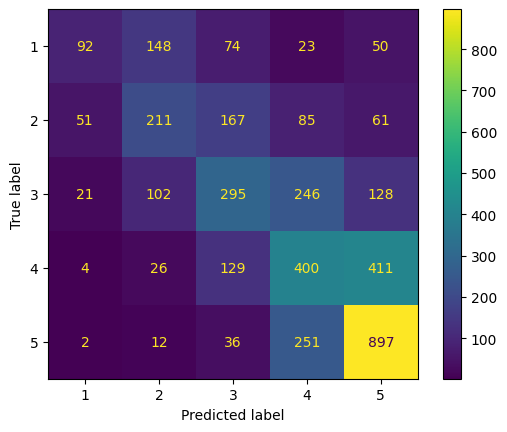

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

#### Utilizando Count Vectorizer

In [ ]:
countV = CountVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]}
            ]

lr_tfidf = Pipeline([('vect', countV),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_cv = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5, verbose=2,
                           n_jobs=1)
gs_lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END clf__C=1.0, clf__penalty=l1, vect__ngram_range=(1, 1), vect__stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', '

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['de', 'la', 'que', 'el', 'en',
                                                'y', 'a', 'los', 'del', 'se',
                                                'las', 'por', 'un', 'para',
                                                '...
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['de', 'la', 'que', 'el', 'en',
                                                'y', 'a', 'los', 'del', 'se',
                                                'las', 'por', 'un', 'para',
                                                'con', 'no', 'una', 'su', 'al',
                                                'lo', 'como', 'más', 'pero',
                                                'sus', 'le', 'ya', 'o', 'este',
                                                'sí', 'porque', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x7952cd5a7130>,
                                              <function tokenizer_porter at 0x7952c882c550>]}],
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameter set: %s" % str(gs_lr_cv.best_params_))

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7952c882c550>}


In [ ]:
print('CV Accuracy: %.3f' % gs_lr_cv.best_score_)

CV Accuracy: 0.458


In [ ]:
clf = gs_lr_cv.best_estimator_
print('Test Accuracy: %.3f'   % clf.score(X_test, y_test))

Test Accuracy: 0.457


In [ ]:
y_pred = gs_lr_cv.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall del modelo:", recall)
print("F1 score:", f1)

Accuracy: 0.45741968383477816
Recall del modelo: 0.45741968383477816
F1 score: 0.45301923843953656


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.35      0.40       387
           2       0.39      0.34      0.36       575
           3       0.39      0.36      0.37       792
           4       0.36      0.39      0.37       970
           5       0.60      0.67      0.63      1198

    accuracy                           0.46      3922
   macro avg       0.44      0.42      0.43      3922
weighted avg       0.45      0.46      0.45      3922



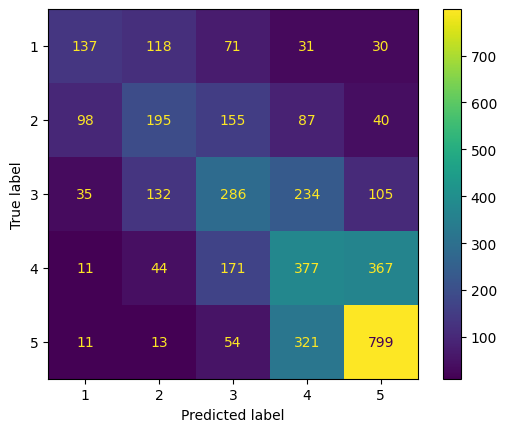

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

#### Utilizando TF-IDF TRANSFORMER

In [ ]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'tfidf__use_idf': [True, False],
               'tfidf__norm': ['l1', 'l2'],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]}]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5, verbose=2,
                           n_jobs=1)
gs_lr_tfidf.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END clf__C=1.0, clf__penalty=l1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 1), vect__stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'tfidf__norm': ['l1', 'l2'],
                          'tfidf__use_idf': [True, False],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['de', 'la', 'que', 'el', 'en',
                                                'y', 'a', 'los', 'del', 'se',
                                                'las', 'por', 'un', 'para',
                                                'con', 'no', 'una', 'su', 'al',
                                                'lo', 'como', 'más', 'pero',
                                                'sus', 'le', 'ya', 'o', 'este',
                                                'sí', 'porque', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer at 0x7952cd5a7130>,
                                              <function tokenizer_porter at 0x7952c882c550>]}],
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameter set: %s" % str(gs_lr_tfidf.best_params_))

Best parameter set: {'clf__C': 100.0, 'clf__penalty': 'l2', 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_porter at 0x7952c882c550>}


In [ ]:
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

CV Accuracy: 0.478


In [ ]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f'   % clf.score(X_test, y_test))

Test Accuracy: 0.476


In [ ]:
y_pred = gs_lr_tfidf.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall del modelo:", recall)
print("F1 score:", f1)

Accuracy: 0.4757776644569097
Recall del modelo: 0.4757776644569097
F1 score: 0.46993375113790603


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.52      0.29      0.38       387
           2       0.40      0.37      0.38       575
           3       0.40      0.39      0.39       792
           4       0.38      0.41      0.40       970
           5       0.61      0.69      0.65      1198

    accuracy                           0.48      3922
   macro avg       0.46      0.43      0.44      3922
weighted avg       0.47      0.48      0.47      3922



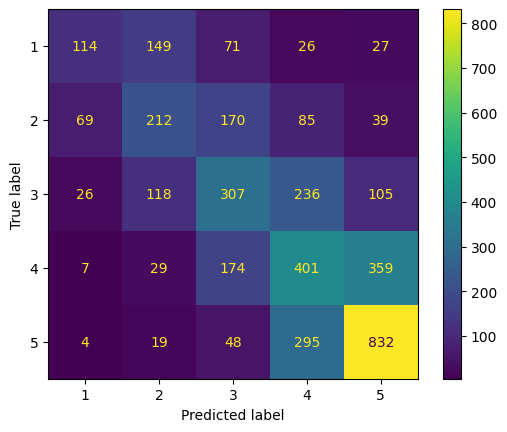

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Basado en los resultados de precisión (accuracy) obtenidos para cada modelo, parece que el modelo construido con TF-IDF Transformer tuvo el mejor desempeño con un accuracy de 0.478, seguido por el modelo construido con TF-IDF Vectorizer con un accuracy de 0.476, y finalmente el modelo construido con Count Vectorizer con un accuracy de 0.457.

Esto sugiere que el TF-IDF Transformer puede haber capturado mejor la información relevante en los datos de texto en comparación con los otros dos métodos de vectorización. Sin embargo, es importante considerar otras métricas de evaluación , como la de F1 Score . La cual nos arroja que TFIDF Transformer tiene el score más alto con 0,47, seguido de 0,46 de Tfidf Vectorizer y por último CountVectorizer con 0,45 en el F1 score.

### 3.2. Naive Bayes

#### Utilizando TFIDF (Term Frequency-Inverse Document Frequency)

In [ ]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_review['Review'], df_review['Class'], test_size=0.3, random_state=42)

# Convertir el texto en características numéricas usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar el modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predecir las clases para el conjunto de prueba
y_pred = nb_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy: ", accuracy)
print("Recall del modelo: ", recall)
print("F1 score: ", f1)

Accuracy:  0.43296327924850553
Recall del modelo:  0.43296327924850553
F1 score:  0.476157888197681


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.01      0.02       246
           2       0.39      0.21      0.28       354
           3       0.34      0.33      0.34       463
           4       0.38      0.39      0.39       603
           5       0.51      0.81      0.62       676

    accuracy                           0.43      2342
   macro avg       0.47      0.35      0.33      2342
weighted avg       0.45      0.43      0.39      2342



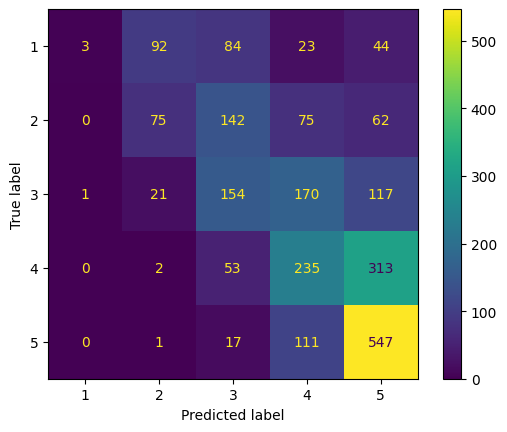

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

#### Utilizando Count Vectorizer

In [ ]:
# Características (texto de las reseñas)
X = df_review['Review']

# Etiquetas (clase de la reseña, 5 para buena, 0 para mala)
y = df_review['Class']

#Division de los textos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
X_test_vec = vectorizer.transform(X_test)

# Predecir las clases para el conjunto de prueba
y_pred = clf.predict(X_test_vec)
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy: ", accuracy)
print("Recall del modelo: ", recall)
print("F1 score: ", f1)

Accuracy:  0.4695707879564382
Recall del modelo:  0.4695707879564382
F1 score:  0.482311159899892


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.11      0.18       160
           2       0.39      0.42      0.41       240
           3       0.38      0.38      0.38       312
           4       0.39      0.47      0.43       397
           5       0.64      0.69      0.66       452

    accuracy                           0.47      1561
   macro avg       0.46      0.41      0.41      1561
weighted avg       0.47      0.47      0.46      1561



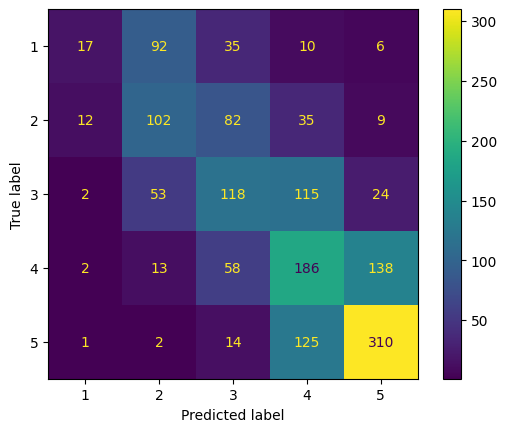

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### 3.3. KNN

#### Utilizando TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
df_review.head()

,Review,Class,Palabras,ContainsNumber
0,nos alojamos en una casa alquilada en la ciudad amurallada parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes tiendas y vida nocturna gran lugar para un grupo con intereses variados no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos asegúrate de aventurarse fuera de la ciudad pero algunos también es un gran lugar para alojarse,4,"[Nos, alojamos, en, una, casa, alquilada, en, la, ciudad, amurallada, ., Parecía, tan, segura, como, cualquier, otra, gran, ciudad, con, un, montón, de, buenos, restaurantes, ,, tiendas, y, vida, nocturna, ., Gran, lugar, para, un, grupo, con, intereses, variados, ,, no, estoy, seguro, de, que, le, traiga, a, los, niños, aquí, sólo, porque, no, hay, mucho, que, hacer, para, ellos, ., Asegúrate, de, aventurarse, fuera, de, la, ciudad, ,, pero, algunos, también, es, un, gran, lugar, para, alojarse]",False
1,la comida está bien pero nada especial yo tenía mejor comida mexcan en los estados unidos las margaritas eran geniales el mahi mahi pescado recocido y seco la carne fajitas aceptable y el coco camarones sabroso el tortilla chips aperitivo fue decepcionante,3,"[La, comida, está, bien, ,, pero, nada, especial, ., Yo, tenía, mejor, comida, Mexcan, en, los, Estados, Unidos, ., Las, margaritas, eran, geniales, ., El, Mahi, Mahi, pescado, recocido, y, seco, ., La, carne, fajitas, aceptable, y, el, coco, camarones, sabroso, ., El, tortilla, chips, aperitivo, fue, decepcionante, .]",False
2,en mi opinión no es una como muchos usuarios reclaman es un gran paladar que parece ser una parada con muchos grupos de excursión el menú es más interesante que los otros restaurantes comimos en la parte más interesante de la experiencia es que el edificio está en una sección de la habana centro las plantas inferiores están muy deteriorados y tienen apartamentos donde viven muchos trabajadores de restaurante los pisos superiores donde el restaurante es han sido restauradas a gloria pasada las reservas son imprescindibles plan de 40 a 50 cuc por persona para una comida con cócteles y vinos más,3,"[En, mi, opinión, ,, no, es, una, como, muchos, usuarios, reclaman, ., Es, un, gran, paladar, que, parece, ser, una, parada, con, muchos, grupos, de, excursión, ., El, menú, es, más, interesante, que, los, otros, restaurantes, comimos, en, ., La, parte, más, interesante, de, la, experiencia, es, que, el, ..., edificio, está, en, una, sección, de, La, Habana, Centro, ., Las, plantas, inferiores, están, muy, deteriorados, ,, y, tienen, apartamentos, donde, viven, muchos, trabajadores, de, restaurante, ., Los, pisos, superiores, ,, donde, el, restaurante, es, ,, han, sido, restauradas, a, gloria, pasada, ., Las, reservas, son, imprescindibles, ., Plan, de, ...]",True
3,esta curiosa forma que asemeja una silla de montar de ahi su nombre es el icono de la ciudad vale mucho la pena si no puedes ubir lo puedes asdnirr de cualquier punto de la ciudad,4,"[esta, curiosa, forma, que, asemeja, una, silla, de, montar, de, ahi, su, nombre, es, el, icono, de, la, ciudad, ,, vale, mucho, la, pena, si, no, puedes, ubir, lo, puedes, asdnirr, de, cualquier, punto, de, la, ciudad]",False
4,lo mejor era la limonada me gusto la comida de todo el mundo y era sosa y un poco frío,2,"[Lo, mejor, era, la, limonada, ., Me, gusto, la, comida, de, todo, el, mundo, y, era, sosa, y, un, poco, frío, .]",False


In [ ]:
vectorizador = TfidfVectorizer(max_features=2500,min_df=7, max_df=0.8)

In [ ]:
df_knn = df_review.copy()
# Se selecciona la variable objetivo
Y = df_knn['Class']
tfidf_wm_knn = vectorizador.fit_transform(df_knn["Review"])
df_final = pd.DataFrame(data = tfidf_wm_knn.toarray(),index = df_knn.index,columns = vectorizador.get_feature_names_out())
df_final.head()

,00,000,10,100,11,12,13,14,15,150,...,época,éramos,éste,íbamos,última,último,últimos,única,único,únicos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


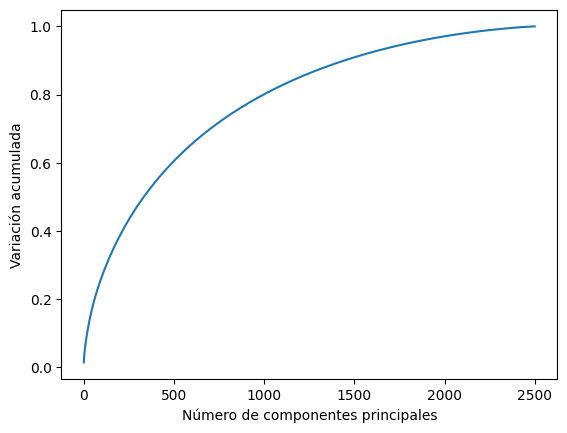

In [ ]:
df_pca = df_final.copy()
pca = PCA()
pca.fit(df_pca)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación acumulada')
plt.show()

In [ ]:
pca = PCA(n_components=1750)
transformados = pca.fit_transform(df_pca)
df_pca = pd.DataFrame(
    data=transformados,
    columns=['PC'+str(x) for x in range(1750)])
pd.concat([df_pca, Y], axis=1)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1741,PC1742,PC1743,PC1744,PC1745,PC1746,PC1747,PC1748,PC1749,Class
0,0.002876,-0.146277,0.021424,-0.098588,0.144639,0.123529,-0.040105,0.000988,-0.108709,-0.009484,...,0.022908,-0.004380,0.013418,0.009161,0.003270,0.012550,-0.020459,0.019458,0.008209,4.0
1,-0.082498,0.042012,0.119019,-0.008097,0.005426,-0.129952,-0.023295,0.101923,0.038389,0.034424,...,0.009542,0.025378,0.007690,-0.029529,0.009459,-0.017313,0.016308,0.003828,0.003482,3.0
2,0.040753,-0.023659,-0.032545,-0.001818,0.148963,0.019589,0.047516,0.120402,0.010694,-0.043064,...,-0.006796,-0.001302,-0.009730,0.005956,0.017359,-0.004642,0.021500,0.003978,-0.002444,3.0
3,-0.088127,-0.161814,-0.071682,-0.004991,-0.014051,-0.060901,-0.032247,-0.074706,0.106496,-0.063687,...,0.008197,-0.005485,0.003876,0.007109,0.014982,0.002317,-0.006708,-0.001295,0.005356,4.0
4,-0.003664,0.056001,0.213381,0.035362,0.078354,-0.155959,-0.069255,-0.082775,0.017635,0.163962,...,-0.005105,-0.000380,-0.002189,0.004217,-0.002555,0.000526,-0.002917,-0.007810,0.002810,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [ ]:
df_pca = df_pca.dropna()
df_pca.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC1740,PC1741,PC1742,PC1743,PC1744,PC1745,PC1746,PC1747,PC1748,PC1749
count,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,...,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03,7.804000e+03
mean,8.706516e-18,1.388490e-17,1.451086e-17,1.251917e-18,2.509525e-17,7.852936e-18,-9.047948e-18,-2.438393e-17,5.804344e-18,1.126726e-17,...,1.974259e-17,3.594994e-17,-6.209794e-18,6.273813e-18,5.228177e-18,5.206838e-18,-2.427012e-17,1.445395e-17,8.123236e-18,9.764599e-18
std,1.132185e-01,9.613472e-02,8.190072e-02,7.979125e-02,7.641095e-02,6.769603e-02,6.609624e-02,6.515574e-02,6.364482e-02,6.179481e-02,...,1.017884e-02,1.016331e-02,1.014514e-02,1.012452e-02,1.011261e-02,1.009861e-02,1.007814e-02,1.006269e-02,1.004989e-02,1.004788e-02
min,-3.339350e-01,-2.238455e-01,-2.824725e-01,-2.486181e-01,-2.637067e-01,-2.476611e-01,-2.641705e-01,-2.247244e-01,-2.405836e-01,-2.384667e-01,...,-4.652550e-02,-4.229367e-02,-4.636620e-02,-4.675106e-02,-3.920191e-02,-4.442203e-02,-3.496686e-02,-3.872660e-02,-3.998268e-02,-3.999042e-02
25%,-8.147639e-02,-7.375824e-02,-5.475506e-02,-5.480434e-02,-5.437957e-02,-4.534312e-02,-4.319537e-02,-4.427187e-02,-4.210464e-02,-4.092173e-02,...,-6.370449e-03,-6.439540e-03,-6.511809e-03,-6.413099e-03,-6.404889e-03,-6.464940e-03,-6.394509e-03,-6.431544e-03,-6.501005e-03,-6.441272e-03
50%,-1.533761e-02,-1.025519e-02,-4.486239e-03,-3.375325e-03,-4.740876e-03,-6.727764e-04,4.429785e-04,-4.217936e-03,5.342989e-04,-1.479567e-03,...,-1.264520e-05,-7.966253e-05,5.556767e-06,9.397477e-05,-2.083270e-05,-1.247641e-06,7.708172e-05,4.398410e-05,5.425746e-05,-4.584989e-05
75%,7.037853e-02,6.103552e-02,5.010375e-02,5.269740e-02,4.963613e-02,4.569800e-02,4.208181e-02,4.084133e-02,4.234229e-02,3.904339e-02,...,6.613323e-03,6.486258e-03,6.571927e-03,6.525361e-03,6.383550e-03,6.532401e-03,6.436757e-03,6.331955e-03,6.438650e-03,6.271874e-03
max,4.993533e-01,4.596752e-01,3.264270e-01,3.396678e-01,3.876927e-01,2.611717e-01,3.029641e-01,2.898151e-01,2.565456e-01,2.674003e-01,...,5.184656e-02,4.477522e-02,4.982188e-02,4.679696e-02,4.342139e-02,5.608854e-02,5.103434e-02,4.156012e-02,4.686594e-02,4.372260e-02


Minimum error:- 0.5576553491351698 at K = 37


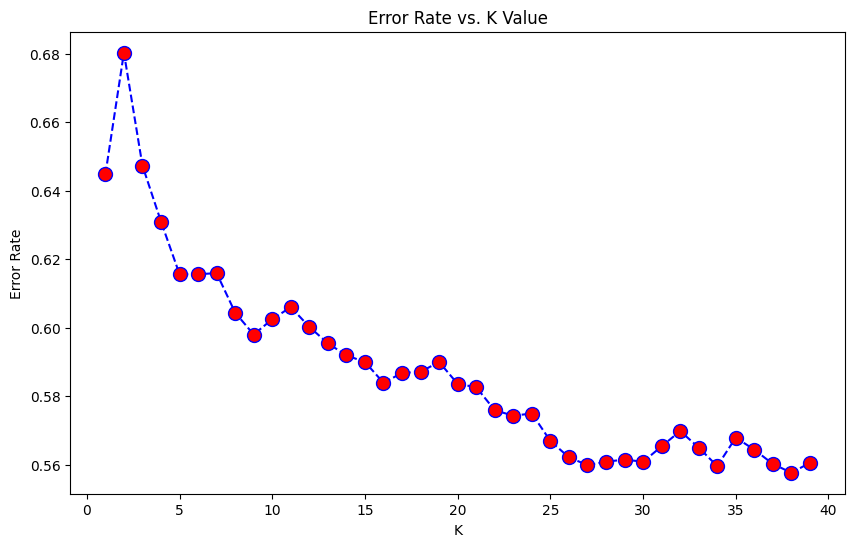

In [ ]:
error_rate = []
X_train, X_test, y_train, y_test = train_test_split(df_pca, Y, test_size=0.4, random_state=0, shuffle=True)
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Text(0, 0.5, 'Accuracy Score')

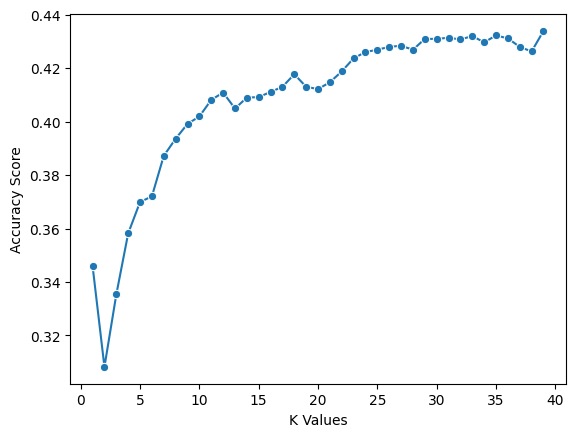

In [ ]:
#Grafico para visualizar en que valor de k se obtiene la precision mas alta, se puede ver que coincide con el grafico del error
scores = []
k_values = [i for i in range (1,40)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4423446508648302


In [ ]:
# Características (texto de las reseñas)
X = df_review['Review']

# Etiquetas (clase de la reseña, 5 para buena, 0 para mala)
y = df_review['Class']

#Division de los textos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_vec = vectorizador.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train_vec, y_train)
X_test_vec = vectorizador.transform(X_test)

# Predecir las clases para el conjunto de prueba
y_pred = knn.predict(X_test_vec)
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy: ", accuracy)
print("Recall del modelo: ", recall)
print("F1 score: ", f1)

Accuracy:  0.4176809737347854
Recall del modelo:  0.4176809737347854
F1 score:  0.4223509680983671


In [ ]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.31      0.38       160
           2       0.36      0.34      0.35       240
           3       0.32      0.27      0.29       312
           4       0.35      0.41      0.37       397
           5       0.55      0.61      0.58       452

    accuracy                           0.42      1561
   macro avg       0.41      0.39      0.39      1561
weighted avg       0.41      0.42      0.41      1561



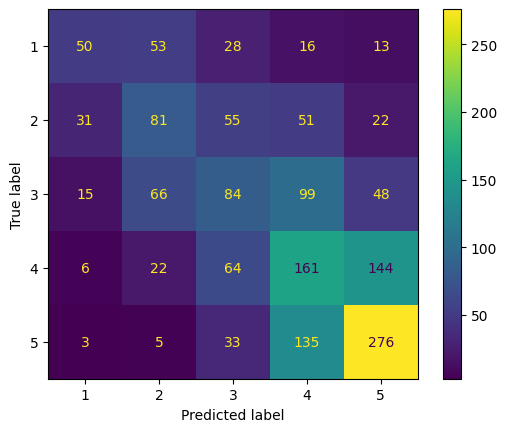

In [ ]:
# Matriz de confusion
labels = [1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## 4. Resultados

### Analisis de los modelos segun su F1 score

Al realizar los diferentes algoritmos (bag of words, naive bayes y KNN), se sacaron diferentes metricas para medir el rendimiento del modelo realizado y saber cual usar para los datos no etiquetados. En nuestro caso, consideramos que la metrica mas importante para tomar esta decision era la del F1 score. Esta es una medida de precisión de un modelo de clasificación que combina la precisión y el recall en una sola métrica y se calcula como la media armónica de la precisión y el recall. La precision hace referencia a que tan bien se ajusta el modelo a los datos reales, mientras que el recall (también conocido como sensibilidad o tasa positiva verdadera) es una métrica de evaluación de modelos de clasificación que mide la proporción de casos positivos reales que el modelo identifica correctamente de entre todos los casos positivos reales en los datos. Con esto en mente, se puede evidenciar que el modelo con mejor ajuste es el de Naive Bayes con count vectorizer, dando un f1 score de 0.4823.

Para el conjunto de datos no etiquetados, realizamos un modelado de los reseñas usando Naive Bayes y count vectorizer para predecir la calificacion de la reseña. Dichos resultados se ven a continuacion:

### Ejecucion de 'Naive Bayes' con datos de prueba

In [ ]:
# Características del nuevo dataset (texto de las reseñas)
X_prueba = df_prueba['Review']
y_prueba = df_prueba.get('Class', None)

# Transformar el texto usando el mejor vectorizador usado en el entrenamiento (CV)
X_prueba_vec = vectorizer.transform(X_prueba)

# Predecir las clases para el conjunto de prueba
y_pred_prueba = clf.predict(X_prueba_vec)

# Crear un DataFrame con las predicciones
resultados_prueba = pd.DataFrame({
    'Review': X_prueba,
    'Class': y_pred_prueba
      })

resultados_prueba


,Review,Prediccion
0,"La primera noche nos encontramos en la habitación con un nido (5) de cucarachas muertas y la alfombra muy sucia...que por cierto nunca limpiaron hasta que reclamamos. La cena de fin de año fue un bufete que acabó en un tremendo desorden por el excesivo número de mesas vendidas, no se podía caminar para ir a servirte la comida, para luego encontrarte con bandejas vacías, mi esposa y yo y otra pareja ""NO CENAMOS"" porque nos encontramos con puras bandejas vacías!!...pagamos $2800 pesos por por pareja por nada!!! El servicio del restaurante pesimo, pesimo,pesimo....se tardaron muchísimo tiempo en atendernos, nos trajeron el desayuno en partes, nunca nos dieron el café que pedimos desde que llegamos....un pésimo servicio El frigobar vacío y después de reclamar lo surtieron pero_x0085_",2
1,"A una calle de catedral con platillos tradicionales, tipo Gourmet, de buen sabor y calidad.\nSi bien ofrecen una carta con los platillos más representativos de cada temporada como mole de caderas, poblano, chinicuiles, chiles en nogada, escamoles y cemitas; son principalmente para degustación, no...Más",5
2,Porciones muy miserables\nAgua con sabor a cloro \nMuy distraídos los meseros \nNo llena las expectativas\nHay mejores opciones,2
3,"Cartagena encanta. De todas las ciudades coloniales que hemos visitado es la más linda y mejor conservada. Recomiendo recorrerla tanto de día como de noche ya que son visiones distintas que vale la pena vivir. Llena de vida, tiendas, restaurantes, colorida, vibrante, calles y rincones que en cada momento guardan una sorpresa. Mi calificación habría sido excelente sino fuera por algunos detalles que deberían mejorar. Lamentablemente falta preocupación por la limpieza de las calles (problema que se repite en el resto de la ciudad) y un mejoramiento en los alcantarillados de las aguas servidas. Además por la estrechez de las calles deberían habilitar vías exclusivas para peatones.",5
4,"Ibamos con mucha ilusion de disfrutar el espectaculo de luz y sonido pero la verdad nos decepcionó,te ubican en una esquina a la entrada de las ruinas,y no al centro por lo que no puedes apreciar casi nada,las personas se paran a tomar fotografias debido a que no se alcanza a ver nada si estas sentado,al inicio y al final del espectaculo no dejan prendidas las luces para que puedas tomar fotografias, al contrario queda todo en obscuridad y las personas de la tercera edad tiene problemas para salir pues no iluminan ni el camino para salida, deberian poner aunque sea unas antorchas para iluminar,la verdad no lo recomiendo es una pena que una maravilla como lo es chichen itza tenga un espectaculo tan carente .",3
...,...,...
1745,"Subir en funicular y bajar en teleferico fue una buena experiencia, lo mejor la vista de bogota en la noche...",5
1746,"La gente espera el lugar central en La Habana, donde las fiestas nacionales, discursos y reuniones poltitical y demonstartions han tenido lugar, a ser impresionante y lleno de aura de eventos. Nada de eso aquí, me temo. El único atractivo son los aspectos de la Plaza los edificios feos de hormigón alrededor con caras gigantes del Che y Cienfuegos en el visitantes mirando hacia abajo. También se puede encontrar una estatua de marti, pero uno no diría que es particularmente impresionante. En resumen, uno ha visto todo lo que hay que verse a menos de cinco minutos. Expectativas y realidad del conflicto en gran medida!",3
1747,"Todo excelente con el hotel: las albercas para los niños de lo mejor, la atención de los meseros, PEEERO lo mejor fue la atención de Jorge Tse de Fotografía su gran disposición y entusiasmo hicieron la experiencia inolvidable por las grandes fotos que nos tomó. ES UN ARTISTA...",5
1748,Nos detuvimos en un bocado antes de la puesta del sol. No había nadie en el restaurante. (¿Me pregunto por qué?) Mi amigo y yo pedimos bebidas y comida. El aperitivo de calamares no tenía sabor. Estaba muy frito y tenía mucho que empanar. Las fajitas de camarón eran 

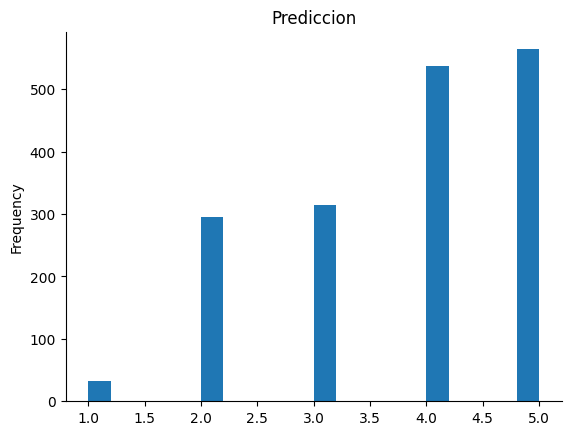

In [ ]:
from matplotlib import pyplot as plt
resultados_prueba['Prediccion'].plot(kind='hist', bins=20, title='Prediccion')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Generacion del archivo .csv con las predicciones de las resenias
df_prueba.to_csv('resultados_prueba.csv', index=False)

## 5. Mapa de actores relacionado con el producto de datos creados

**Tabla con el mapa de actores relacionados con el producto de datos creados**

  | Rol dentro de la empresa | Tipo de actor | Beneficio | Riesgo |
  | - | - | - | - |
  | Ministerio de Comercio, Industria y Turismo de Colombia | Financiador | Puede utilizar la información para desarrollar políticas y estrategias que promuevan el turismo en Colombia | Si el modelo no tiene un buen desempeño, las políticas y estrategias pueden basarse en información incorrecta, lo que podría no tener el efecto deseado en el turismo |
  | Asociación Hotelera y Turística de Colombia (COTELCO) | Usuario-Cliente | Puede utilizar los resultados para mejorar la calidad de los servicios turísticos y promover destinos turísticos específicos | Si el modelo no funciona correctamente, las estrategias de promoción podrían dirigirse incorrectamente, lo que podría afectar la reputación de los destinos turísticos |
  | Cadenas hoteleras (Hilton, Hoteles Estelar, Holiday Inn, etc.) | Beneficiario | Pueden utilizar la información para adaptar sus servicios y promociones a las preferencias de los turistas | Si el modelo no es preciso, las adaptaciones de servicios y promociones podrían no ser efectivas, lo que podría afectar su competitividad en el mercado |
  | Hoteles pequeños en diferentes municipios de Colombia | Beneficiario | Pueden mejorar sus servicios y promocionarse de manera más efectiva, lo que puede aumentar su popularidad entre los turistas | Si el modelo no funciona correctamente, las mejoras en los servicios y la promoción podrían no ser adecuadas, lo que podría no tener el efecto deseado en la atracción de turistas |
  | Turistas locales y extranjeros | Usuario-Cliente | Pueden beneficiarse al recibir recomendaciones más precisas y adaptadas a sus preferencias individuales | Si el modelo no es preciso, las recomendaciones pueden no ser relevantes para los turistas, lo que podría afectar su experiencia de viaje |


## 6. Construccion del pipeline


### 6.1. Pipleine

In [ ]:
X_pl = df_review['Review']
y_pl = df_review['Class']

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_pl, y_pl)

X_test = df_prueba['Review']
y_pred = model.predict(X_test)

df_prueba['Class'] = y_pred


### 6.2. Exportacion del modelo

In [ ]:
dump(pipeline, 'predictedReviews.joblib')